#EROSION
Erosion primarily involves eroding the outer surface (the foreground) of the image. 

True

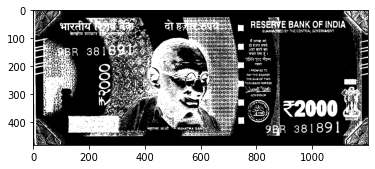

In [ ]:

# import the necessary packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the image
img = cv2.imread(r"currency.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((1, 2), np.uint8)

# invert the image
invert = cv2.bitwise_not(binr)

# erode the image
erosion = cv2.erode(invert, kernel,
					iterations=1)

# print the output
plt.imshow(erosion, cmap='gray')
cv2.imwrite('erosion.jpg',erosion)


#**Dilation**

Dilation involves dilating the outer surface (the foreground) of the image.

True

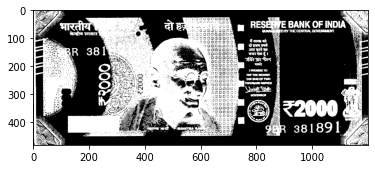

In [ ]:
import cv2

# read the image
img = cv2.imread(r"currency.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((1, 2
                  ), np.uint8)

# invert the image
invert = cv2.bitwise_not(binr)

# dilate the image
dilation = cv2.dilate(invert, kernel, iterations=1)

# print the output
plt.imshow(dilation, cmap='gray')
cv2.imwrite('dilation.jpg',dilation)

#**Opening**

Opening involves erosion followed by dilation in the outer surface (the foreground) of the image

In [ ]:
# import the necessary packages
import cv2

# read the image
img = cv2.imread(r"currency.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255,
					cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((2, 2), np.uint8)

# opening the image
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN,
						kernel, iterations=1)
# print the output
plt.imshow(opening, cmap='gray')
cv2.imwrite('opening.jpg',opening)


True

#**Closing**

Closing involves dilation followed by erosion in the outer surface (the foreground) of the image.

True

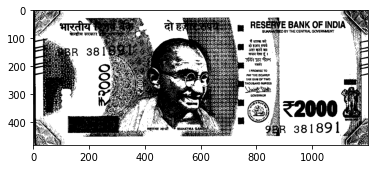

In [ ]:
# import the necessary packages
import cv2

# read the image
img = cv2.imread(r"currency.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((2, 1), np.uint8)

# opening the image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)

# print the output
plt.imshow(closing, cmap='gray')
cv2.imwrite('closing.jpg',closing)


#**Morphological Gradient**
Morphological gradient is slightly different than the other operations, because, the morphological gradient first applies erosion and dilation individually on the image and then computes the difference between the eroded and dilated image. 

In [ ]:
# import the necessary packages
import cv2

# read the image
img = cv2.imread(r"currency.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((1, 2), np.uint8)

# invert the image
invert = cv2.bitwise_not(binr)

# use morph gradient
morph_gradient = cv2.morphologyEx(invert,
								cv2.MORPH_GRADIENT,
								kernel)

# print the output
plt.imshow(morph_gradient, cmap='gray')
cv2.imwrite('morphologicalgradient.jpg',morph_gradient)


True

#6. Top Hat

It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

In [ ]:
# import the necessary packages
import cv2

# read the image
img = cv2.imread("currency.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((2, 2), np.uint8)

# use morph gradient
morph_gradient_top = cv2.morphologyEx(binr,
								cv2.MORPH_TOPHAT,
								kernel)
# print the output
plt.imshow(morph_gradient, cmap='gray')


#Black Hat
The black-hat operation is used to do the opposite, enhancing dark objects of interest on a bright background. The output of this operation is the difference between the closing of the input image and the input image. 

In [ ]:
# import the necessary packages
import cv2

# read the image
img = cv2.imread("currency.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((2, 2), np.uint8)

# invert the image
invert = cv2.bitwise_not(binr)

# use morph gradient
morph_gradient_black = cv2.morphologyEx(invert,
								cv2.MORPH_BLACKHAT,
								kernel)
# print the output
plt.imshow(morph_gradient, cmap='gray')


In [ ]:
import math
import numpy as np
import cv2

def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()


def calculate_ssim(img1, img2):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 255]
    '''
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')
print(f"SSIM value of Erosion {calculate_ssim(img,erosion)} dB")
print(f"SSIM value of Dilation {calculate_ssim(img,dilation)} dB")

print(f"SSIM value of Gradient {calculate_ssim(img,morph_gradient)} dB")
print(f"SSIM value of Top Hat {calculate_ssim(img,morph_gradient_top)} dB")
print(f"SSIM value of Black Hat {calculate_ssim(img,morph_gradient_black)} dB")

SSIM value of Erosion -0.10445195106390846 dB
SSIM value of Dilation -0.10187547226865627 dB
SSIM value of Gradient 0.021245911138317558 dB
SSIM value of Top Hat 0.05789686179169698 dB
SSIM value of Black Hat 0.05789686179169698 dB
